In [2]:
print("hello")

hello


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import aqi
import missingno as msno
from fancyimpute import SimpleFill, KNN, MatrixFactorization, IterativeImputer 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

d:\AQI_forecasting\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import pandas as pd
data_path = r"D:\AQI_forecasting\backend\data\bangkok-air-quality.csv"

df= pd.read_csv(data_path)
df.columns = df.columns.str.strip()
df.rename(columns={
    'date': 'ds',
    'pm25': 'y',
    
}, inplace=True)
print(df)
df['ds'] = pd.to_datetime(df['ds'])
df['y']=pd.to_numeric(df['y'], errors='coerce')
df

In [ ]:
model = AutoARIMA(seasonal=True, m=12)
sf = StatsForecast(df, models=[model], freq='D')

forecast = sf.forecast(h = 10)

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

API_KEY = os.getenv('API_KEY')
print(API_KEY)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Sample time series data
data = {
    'ds': pd.date_range(start='2022-01-01', periods=24, freq='M'),  # Monthly data
    'y': [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 
          115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140]
}
df = pd.DataFrame(data)

# Preparing the data for StatsForecast
df['unique_id'] = 1  # Single time series, use '1' as unique_id

# Initialize the AutoARIMA model
models = [AutoARIMA(season_length=12)]  # Monthly seasonality

# Create a StatsForecast instance
sf = StatsForecast(models=models, freq='M')

# Fit the model and forecast the next 12 periods
forecasts = sf.forecast(df=df, h=12)

# Generate synthetic actual data for comparison (e.g., with some noise)
np.random.seed(42)  # For reproducibility
forecast_dates = pd.date_range(start=df['ds'].iloc[-1] + pd.DateOffset(months=1), periods=12, freq='M')
actual_values = forecasts['AutoARIMA'] + np.random.normal(0, 5, size=12)  # Add random noise to predictions

# Create a DataFrame for the forecasted and actual data
forecast_df = pd.DataFrame({
    'ds': forecast_dates,
    'predicted': forecasts['AutoARIMA'],
    'actual': actual_values
})

# Calculate errors
mae = mean_absolute_error(forecast_df['actual'], forecast_df['predicted'])
mse = mean_squared_error(forecast_df['actual'], forecast_df['predicted'])
rmse = np.sqrt(mse)

# Print errors
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Actual Data (Historical)', marker='o')
plt.plot(forecast_df['ds'], forecast_df['predicted'], label='Predicted', marker='x', linestyle='--')
plt.plot(forecast_df['ds'], forecast_df['actual'], label='Actual Data (Forecast Period)', marker='o', linestyle=':')
plt.title('Time Series Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.utils import AirPassengersDF

import pandas as pd
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv', parse_dates=['ds'])
df.head()


In [ ]:
sf = StatsForecast(models=[AutoARIMA(season_length=12)],freq='MS')
sf.fit(df)

In [ ]:
forecast_df = sf.predict(h=12, level=[90])
forecast_df.tail()

In [ ]:
sf.plot(df, forecast_df, level=[90])

In [ ]:
Y_df = pd.read_parquet('https://datasets-nixtla.s3.amazonaws.com/m4-hourly.parquet')
Y_df.head()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast

data_aqi = pd.read_csv(r'D:\AQI_forecasting\backend\data\bangkok-air-quality.csv')
data_aqi
data_aqi.columns = data_aqi.columns.str.strip()

#convert date format
data_aqi['date'] = pd.to_datetime(data_aqi['date'], errors='coerce')
data_aqi = data_aqi.dropna(subset=['date'])
#sorting date
data_aqi = data_aqi.sort_values('date')

#select target to train
data_aqi['pm25'] = pd.to_numeric(data_aqi['pm25'], errors='coerce') #turn blank value to NaN
data_aqi = data_aqi.set_index('date').asfreq('D')
data_aqi['pm25'] = data_aqi['pm25'].interpolate() #interpolate missing value

sf =  StatsForecast(
    models=[AutoARIMA()],
    freq='D' #daily
)

forecasts_horizon = 30
forecasts = sf.forecast(data_aqi[['pm25']], h=forecasts_horizon)

plt.figure(figsize=(12,6))
plt.plot(data_aqi.index, data_aqi['pm25'], label = 'Historical Data', color='blue')
plt.plot(forecast.index, forecast['autoarima'], label='Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Pm 2.5')
plt.title('ARIMA Model Predition')
plt.legend()
plt.grid(True)
plt.show()




In [3]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import os
import aqi
import missingno as msno
from fancyimpute import SimpleFill, KNN, MatrixFactorization, IterativeImputer 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

data_path = r"D:\AQI_forecasting\backend\data\bangkok-air-quality.csv"
aqi_data = pd.read_csv(data_path)
aqi_data.head()

,date,pm25,pm10,o3,no2,so2,co
0,2025/1/1,116,50,15,2,,
1,2025/1/2,119,56,19,2,,
2,2025/1/3,120,58,24,1,,
3,2025/1/4,114,62,22,2,,
4,2025/1/5,119,68,22,2,,


In [4]:
def remove_whitespace_header(df):
    df.columns = df.columns.str.strip()
    return df

def update_data_aqi(df):
    return df

def cleaning_data(df):
    # Remove whitespace from column headers
    df = remove_whitespace_header(df)
    
    # Ensure 'date' column exists before processing
    if 'date' not in df.columns:
        raise KeyError("'date' column is missing in the DataFrame.")
    
    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Convert other columns to numeric, if applicable
    for col in df.columns:
        if col != 'date':  # Skip 'date' column
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Sort by 'date' and reset index
    df = df.sort_values('date').reset_index(drop=True)
    return df

def extract_aqi(df):
    aqi_list = []
    df = df.replace({'NaT': np.nan})
    col_name = df.columns
    
    for idx, row in df.iterrows():
        # Initialize variables based on row data
        aqi_val = row['aqi'] if 'aqi' in col_name else np.nan
        pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
        
        # Create the input list for AQI calculation, filtering out NaN values
        input_list = [
            (pollutant, row[pollutant]) 
            for pollutant in pollutants 
            if pollutant in df.columns and not np.isnan(row[pollutant])
        ]
        
        # Handle AQI calculation if necessary
        if np.isnan(aqi_val) and len(input_list) > 1:
            try:
                calc_aqi = aqi.to_aqi(input_list, algo=aqi.ALGO_MEP)
                aqi_list.append(float(calc_aqi))
            except ValueError:
                aqi_list.append(np.nan)  # In case of any error, append NaN
        elif np.isnan(aqi_val) and len(input_list) == 1:
            val = input_list[0]
            try:
                # Call to_aqi() with the 'algo' argument explicitly
                calc_aqi = aqi.to_aqi([val], algo=aqi.ALGO_MEP)  # Pass as a list and specify the algorithm
                aqi_list.append(calc_aqi)
            except ValueError:
                aqi_list.append(np.nan)  # In case of any error, append NaN
        elif len(input_list) < 1:
            aqi_list.append(np.nan)
        else:
            aqi_list.append(float(aqi_val))
        
    df['aqi'] = aqi_list
    return df

    
aqi_cleaning = cleaning_data(aqi_data)
aqi_cleaning = extract_aqi(aqi_cleaning)
aqi_cleaning
    

,date,pm25,pm10,o3,no2,so2,co,aqi
0,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0,NaN
1,2014-01-01,NaN,84.0,90.0,48.0,5.0,16.0,67.0
2,2014-01-02,NaN,84.0,119.0,63.0,7.0,14.0,67.0
3,2014-01-03,NaN,103.0,95.0,57.0,7.0,13.0,77.0
4,2014-01-04,NaN,101.0,52.0,34.0,1.0,NaN,76.0
...,...,...,...,...,...,...,...,...
4021,2025-01-11,84.0,57.0,18.0,3.0,NaN,NaN,111.0
4022,2025-01-12,101.0,66.0,20.0,2.0,NaN,NaN,132.0
4023,2025-01-13,129.0,73.0,21.0,2.0,NaN,NaN,170.0
4024,2025-01-14,150.0,74.0,19.0,2.0,NaN,NaN,200.0


In [5]:
cols = ['date','aqi']
aqi_complete = aqi_cleaning[cols]
aqi_complete['aqi'] = pd.to_numeric(aqi_complete['aqi'], errors='coerce')

aqi_complete = aqi_complete[aqi_complete.date >= '2016-01-01'].reset_index(drop=True)
aqi_complete = aqi_complete.rename(columns={'aqi': 'bangkok_aqi'}).set_index('date')
aqi_complete.head()
aqi_complete.tail()

C:\Users\user\AppData\Local\Temp\ipykernel_22180\2949037849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_complete['aqi'] = pd.to_numeric(aqi_complete['aqi'], errors='coerce')


,bangkok_aqi
date,
2025-01-11,111.0
2025-01-12,132.0
2025-01-13,170.0
2025-01-14,200.0
2025-01-15,208.0


In [6]:
def plot_imputation(data_series, imputed_sf, imputed_knn, imputed_mice):
    df = pd.DataFrame(data_series)
    
    df['sf'] = np.squeeze(imputed_sf)
    df['knn'] = np.squeeze(imputed_knn)
    df['mice'] = np.squeeze(imputed_mice)
    
    if df.index.name != 'date':
        df['date'] = pd.to_datetime(df.index)
        df.set_index('date', inplace=True)
        
    start_date = df.index.min()
    end_date = df.index.max()
    
    df = df[start_date:end_date]
    
    fig, axes = plt.subplots(3, 1, figsize=(15, 4 * 6), dpi=100)
    
    axes[0].plot(df.index, df.sf, marker='o', color='red', label='Simple Fill')
    axes[0].plot(df.index, df[data_series.name], marker='o', color='blue', label='Original Data')
    axes[0].set_title('Simple Fill (Gaussian Noise)')
    axes[0].legend()
    
    axes[1].plot(df.index, df.knn, marker='o', color='red', label='KNN Imputation')
    axes[1].plot(df.index, df[data_series.name], marker='o', color='blue', label='Original Data')
    axes[1].set_title('KNN Imputation')
    axes[1].legend()
    
    axes[2].plot(df.index, df.mice, marker='o', color='red', label='MICE Imputation')
    axes[2].plot(df.index, df[data_series.name], marker='o', color='blue', label='Original Data')
    axes[2].set_title('MICE Imputation')
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()


In [7]:
aqi_complete.bangkok_aqi[aqi_complete.bangkok_aqi.isnull()==True]

date
2016-01-01   NaN
2016-01-02   NaN
Name: bangkok_aqi, dtype: float64

In [8]:
bangkok_imputed_sf = SimpleFill(fill_method="random", min_value= min(aqi_complete.bangkok_aqi.dropna())).fit_transform(aqi_complete.bangkok_aqi.values.reshape(-1,1))

bangkok_imputed_knn = KNN(k=10, verbose=False).fit_transform(aqi_complete.bangkok_aqi.values.reshape(-1,1))

bangkok_imputed_mice = IterativeImputer(max_iter=100, verbose=False).fit_transform(aqi_complete.bangkok_aqi.values.reshape(-1,1))


d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AQI_forecasting\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


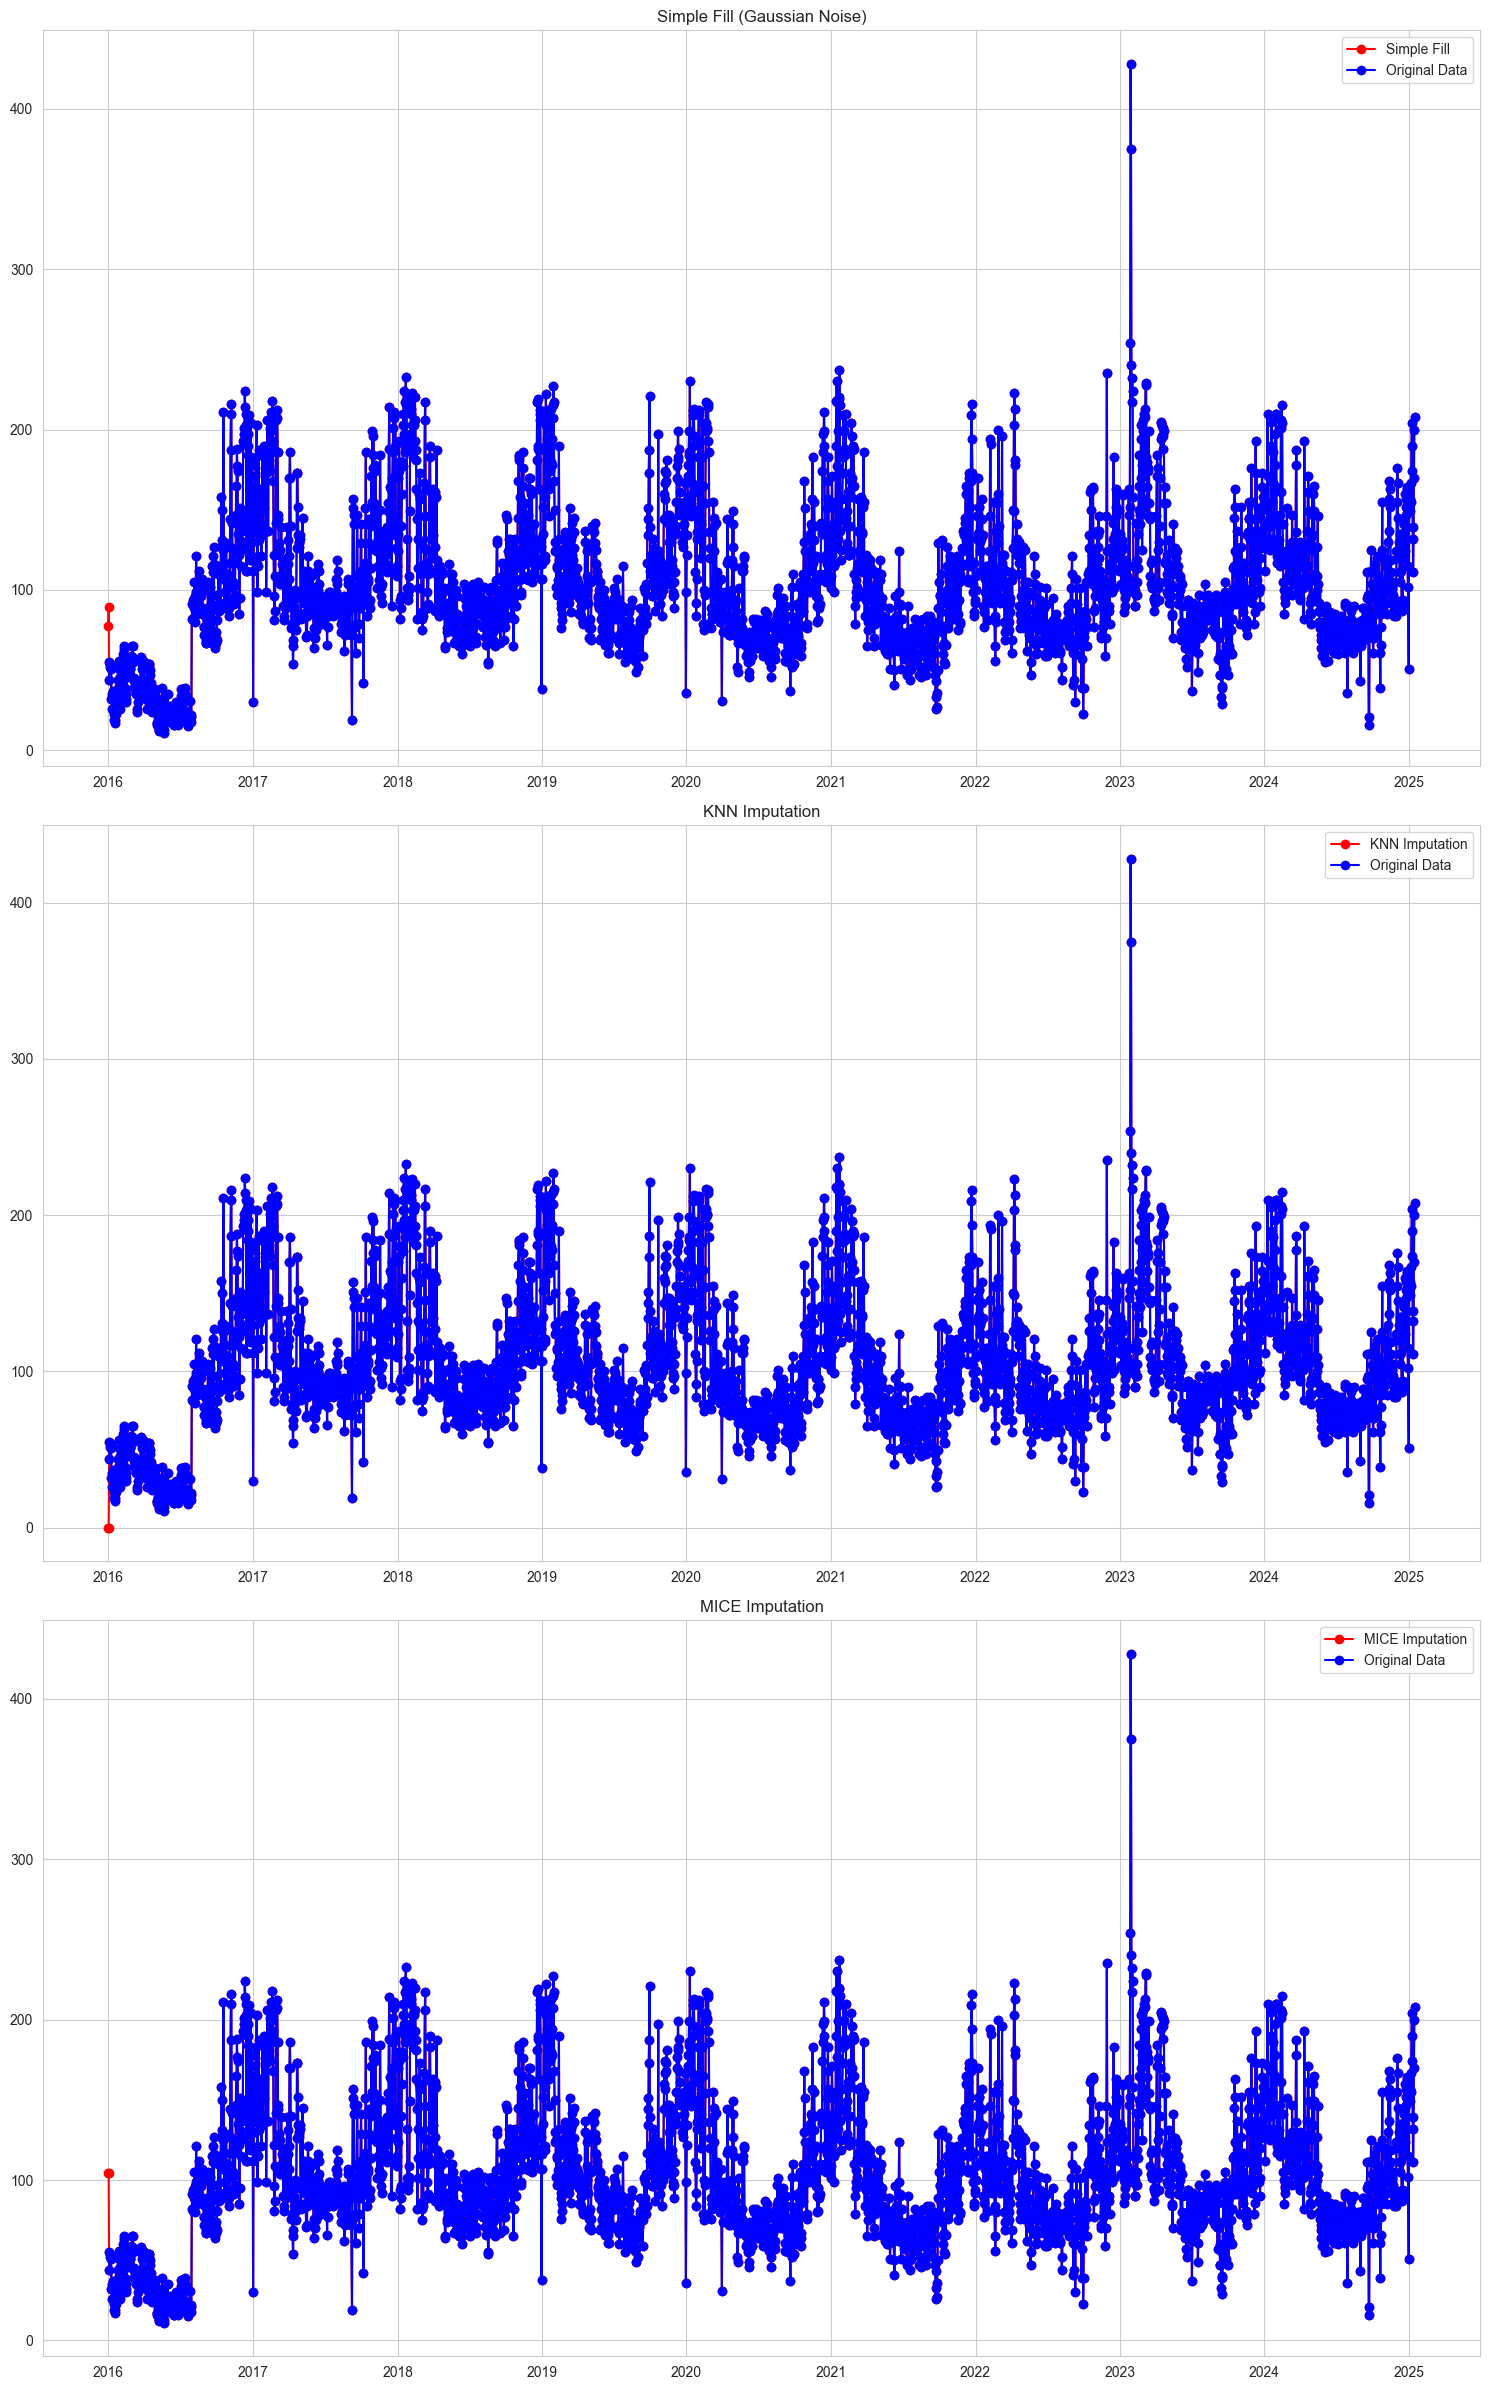

In [9]:
plot_imputation(aqi_complete.bangkok_aqi,
                bangkok_imputed_sf,
                bangkok_imputed_knn,
                bangkok_imputed_mice,
                )